In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append(r'D:\github\ripple_heterogeneity\python')
import replay_rank_order
import functions,loading
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import importlib
import glob
import os
import pickle
import replay_fig
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
import random

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [36]:
basepath = 'Z:\Data\GrosmarkAD\Achilles\Achilles_10252013'

st,cell_metrics = loading.load_spikes(basepath,putativeCellType='Pyramidal',brainRegion='CA1')
ripples = loading.load_ripples_events(basepath)

ripple_epoch = nel.EpochArray(np.array([ripples.start, ripples.stop]).T)

beh_df = loading.load_epoch(basepath)
beh_epochs = nel.EpochArray(np.array([beh_df.startTime, beh_df.stopTime]).T)



In [6]:
basepath = 'Z:\Data\GrosmarkAD\Achilles\Achilles_10252013'

ripples = loading.load_ripples_events(basepath)

ripple_epoch = nel.EpochArray(np.array([ripples.start, ripples.stop]).T)


nChannels, fs, fs_dat, shank_to_channel = loading.loadXML(basepath)
lfp, timestep = loading.loadLFP(basepath,
                                n_channels=nChannels,
                                channel=[74, 83],
                                frequency=fs,
                                ext='lfp')


In [8]:
lfp = nel.AnalogSignalArray(data=lfp.T, timestamps=np.array(timestep), fs=1250)


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


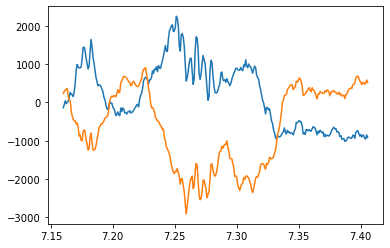

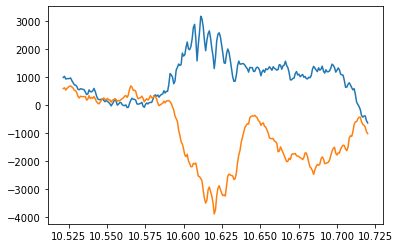

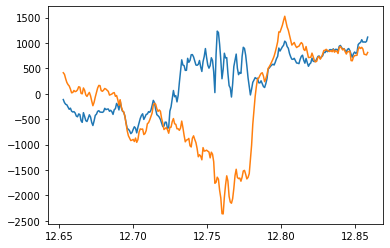

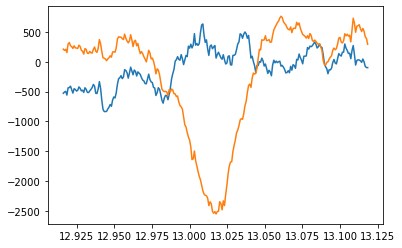

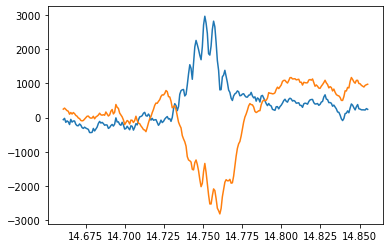

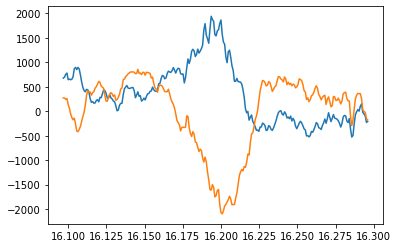

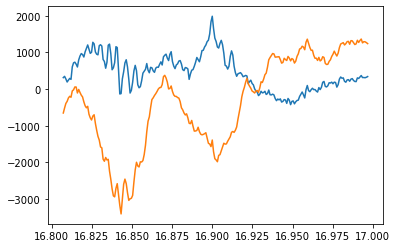

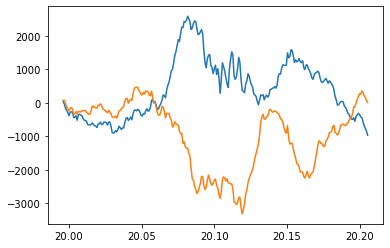

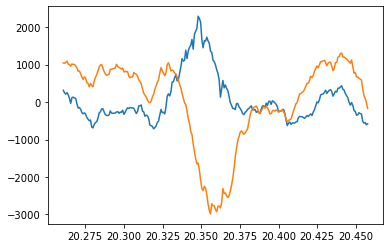

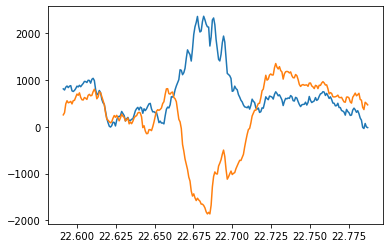

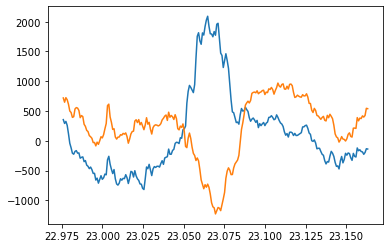

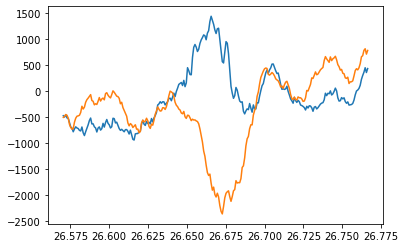

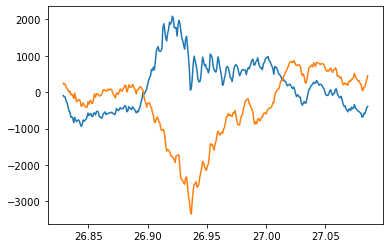

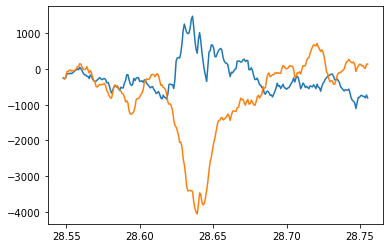

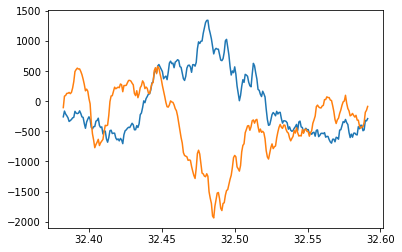

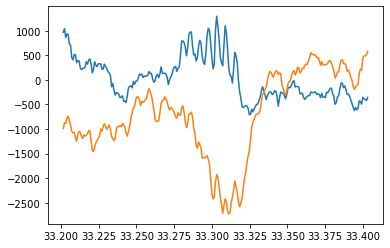

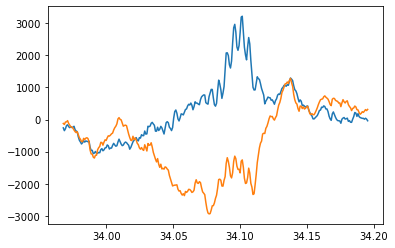

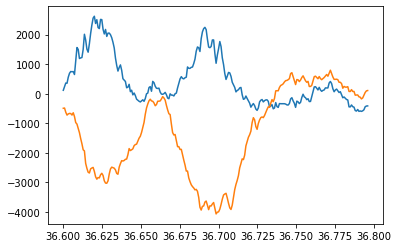

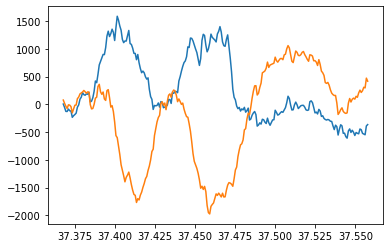

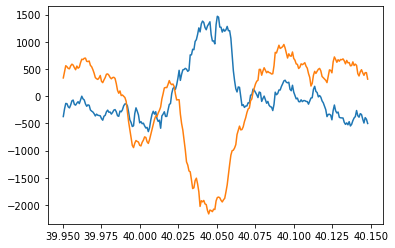

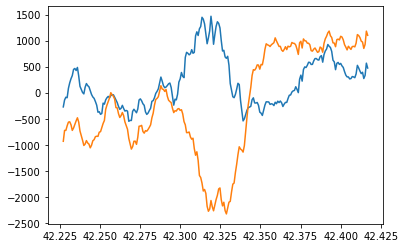

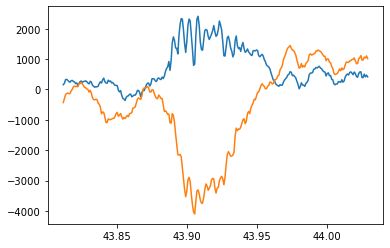

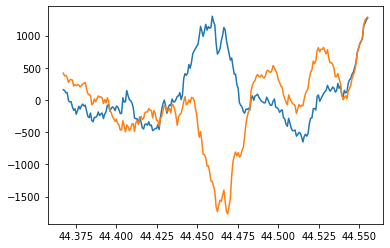

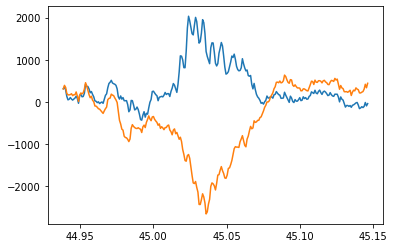

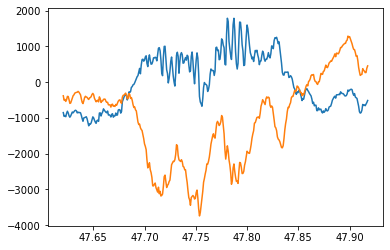

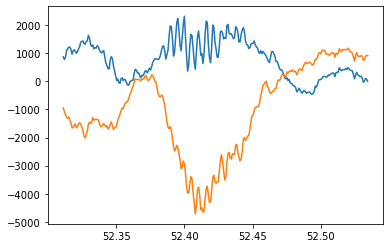

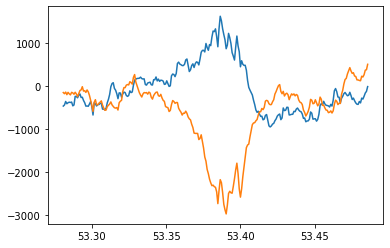

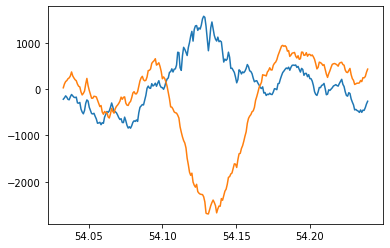

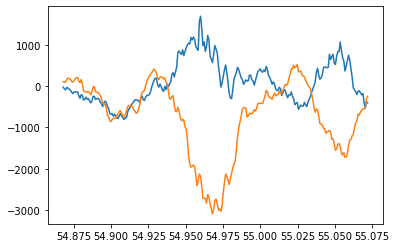

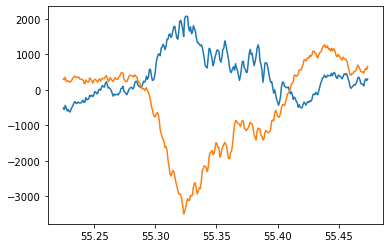

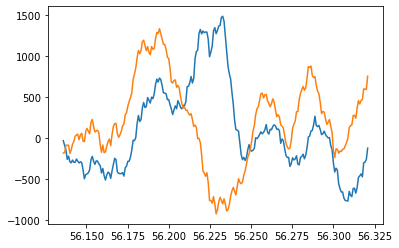

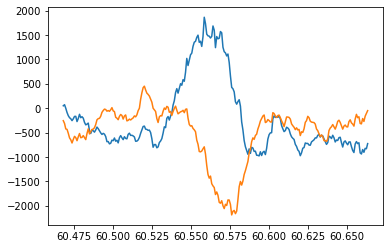

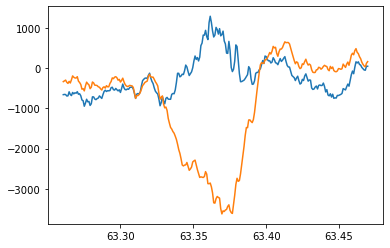

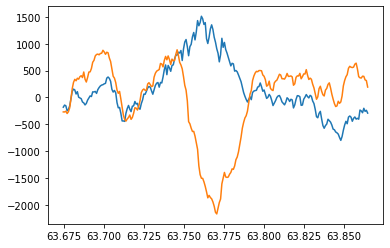

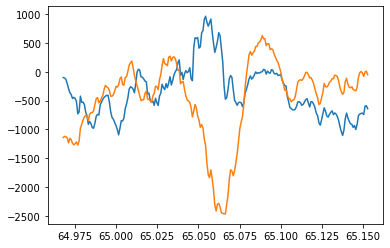

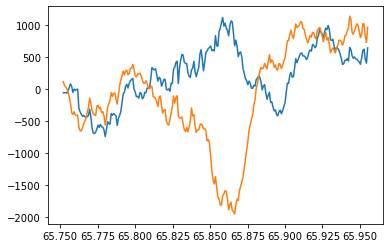

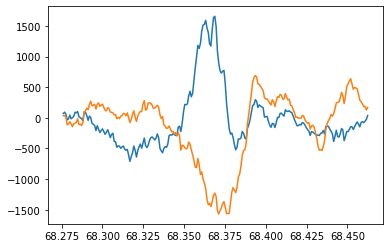

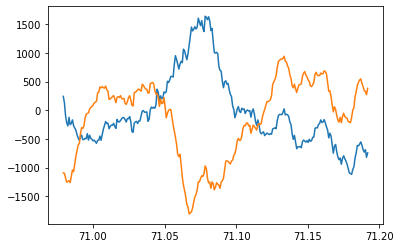

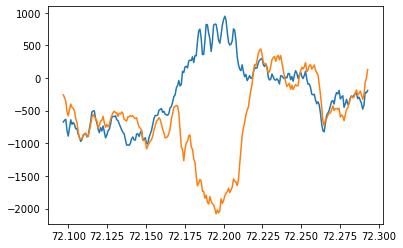

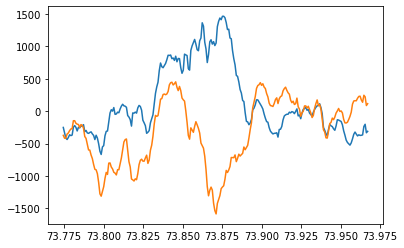

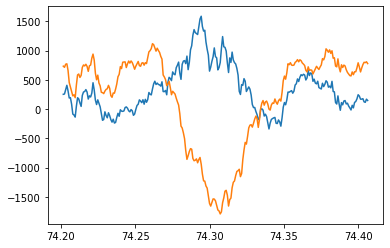

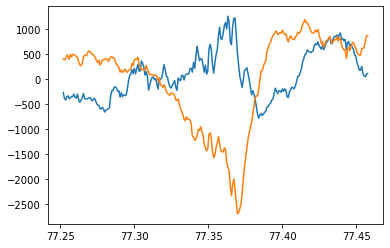

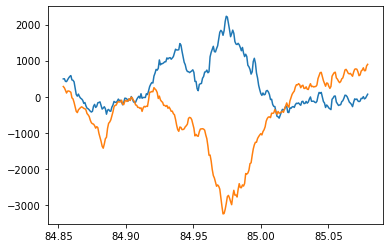

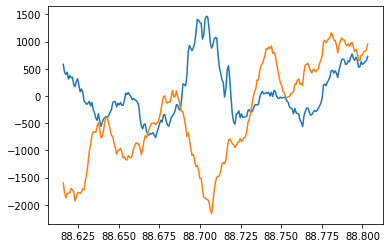

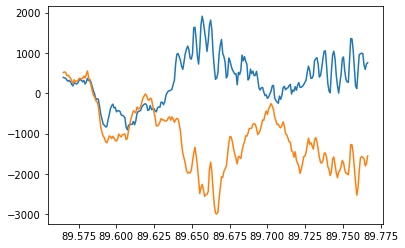

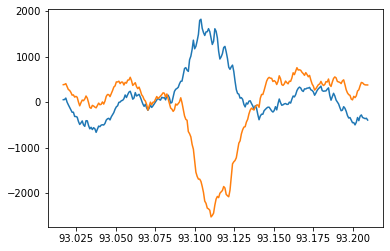

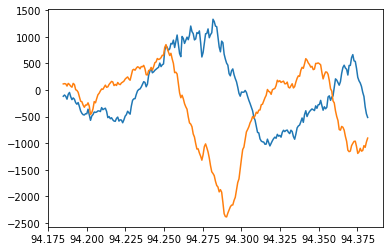

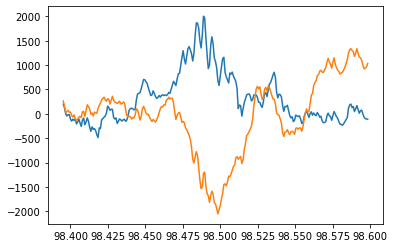

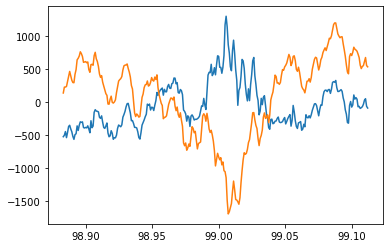

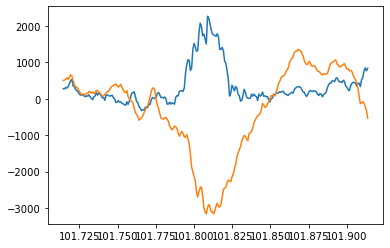

In [11]:
import warnings
warnings.filterwarnings("ignore")
for i, ep in enumerate(ripple_epoch[0:50]):
    plt.figure()
    plt.plot(lfp[ep.expand(0.075)].abscissa_vals, lfp[ep.expand(0.075)].data.T)
